# Zadanie
Zadanie polega na własnoręcznym zaimplementowaniu algorytmu k-means. Algorytm powinien być zaimplementowany w oparciu o bibliotekę `Numpy`. Podczas implementacji nie wolno korzystać z bibliotek typu `sklearn`, które mają ten algorytm wbudowany. Dopuszczalne jest natomiast wykorzystywanie tego rodzaju bibliotek w celach porównawczych, do sprawdzenia czy nasz algorytm działa poprawnie. Ocenie podlega rozwiązanie i odpowiedź.


- Zaimplementuj `K-means` w przestrzeni dwuwymiarowej (każdy punkt ma dwie współrzędne). - *(dostateczny)*
- Zmniejsz problem związany z 'utknięciem' w lokalnym optimum poprzez wywołanie algorytmu 100 razy i wybranie rozwiązania z najmniejszą funkcją kosztu - *(dostateczny plus)*
- Zwizualizuj wyniki na wykresie - *(dobry)*
- Rozszerz swoją implementację o `K-means++` lub zmień ją tak by działała w n-wymiarowej przestrzeni - *(bardzo dobry)*

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Przykładowy kod do generowania punktów

In [ ]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

Przykładowy kod do wyświetlenia wygenerowanych punktów

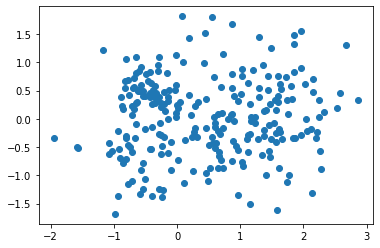

In [ ]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()

In [ ]:
import numpy as np
from scipy.spatial import distance
import random
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1-point2)**2))


class KMeans:

    def __init__(self, X, n_clusters=3, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.plot_steps = True
        self.num_examples = X.shape[0]
        self.num_features = X.shape[1]

    def initialize_centroids(self, X):

        sample_indexes = np.random.choice(self.num_examples, self.n_clusters, replace=False)
        centroids = [X[index] for index in sample_indexes]

        return centroids

    def initialize_centroids_plus(self, X):

        centroids = []
        centroids.append(X[np.random.randint(self.num_examples)])

        for centroid in range(self.n_clusters - 1):
            distances = []

            for i in range(self.num_examples):
                point = X[i,:]
                d = np.amax(X)

                for j in range(len(centroids)):
                    dist = (euclidean_distance(point, centroids[j])**2)
                    d = min(d, dist)
                distances.append(d)

            distances = np.array(distances)
            next_centroid = X[np.argmax(distances), :]
            centroids.append(next_centroid)
            distances = []

        return centroids

    def create_clusters(self, X, centroids):
        clusters = [[] for _ in range(self.n_clusters)]

        for point_index, point in enumerate(X):
            centroid_index = self._closest_centroid(point, centroids)
            clusters[centroid_index].append(point_index)
        
        return clusters

    def _closest_centroid(self, point, centroids):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]

        return np.argmin(distances)

    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.n_clusters, self.num_features))

        for index, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[index] = new_centroid

        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.empty(self.num_examples)

        for cluster_index, cluster in enumerate(clusters):
            for point_index in cluster:
                y_pred[point_index] = cluster_index

        return y_pred

    def display_plot(self, X, y, centroids):
        for point in centroids:
            plt.scatter(*point, marker='x', color='black', s=100)
        plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
        plt.show()
        
    def is_converged(self, previous_centroids, centroids):
        distances = [euclidean_distance(previous_centroids[i], centroids[i]) for i in range(self.n_clusters)]

        return sum(distances) == 0

    def fit(self, X):
        centroids = self.initialize_centroids_plus(X)

        for _ in range(self.max_iters):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)  

            if self.is_converged(previous_centroids, centroids):
                break

        y_pred = self.predict_cluster(clusters, X)

        self.display_plot(X, y_pred, centroids)

        return y_pred

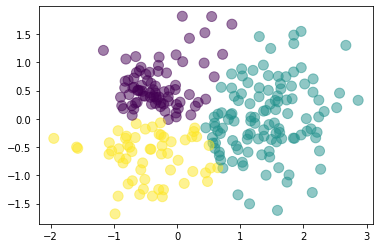

In [ ]:
from sklearn.cluster import KMeans as sklearn_Kmeans
k_means = sklearn_Kmeans(n_clusters=3)
k_means.fit(points)
y_kmeans = k_means.predict(points)

plt.scatter(points[:, 0], points[:, 1], c=y_kmeans, s=100, alpha=0.5, )


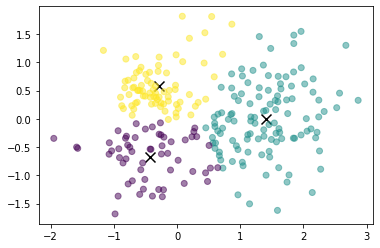

In [ ]:
my_kmeans = KMeans(points, max_iters=100)
y_pred = my_kmeans.fit(points)